In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import imageio
import matplotlib.animation as animation

### pip install -i https://pypi.tuna.tsinghua.edu.cn/simple imageio-ffmpeg
### pip install -i https://pypi.tuna.tsinghua.edu.cn/simple imageio

In [2]:
from IPython.display import HTML

In [3]:
# 定义一个展示视频的函数
def display(driving, fps, size=(8, 6)):
    fig = plt.figure(figsize=size)

    ims = []
    for i in range(len(driving)):
        cols = []
        cols.append(driving[i])

        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    video = animation.ArtistAnimation(fig, ims, interval=1000.0/fps, repeat_delay=1000)

    plt.close()
    return video

In [20]:
# 展示一下输入的视频, 如果视频太大，时间会非常久，可以跳过这个步骤
video_path = 'Peking_input360p_clip6_5s.mp4'
video_frames = imageio.mimread(video_path, memtest=False)

# 获得视频的原分辨率
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
    

HTML(display(video_frames, fps).to_html5_video())

In [4]:
print('hello world')

hello world


### 利用opencv读取图片并显示

<img src="./Picture/House256rgb.png" width="20%">

In [5]:
img = cv2.imread('./Picture/House256rgb.png', 1)
cv2.imshow('Image', img)
cv2.waitKey()
cv2.destroyAllWindows() 

In [2]:
img = cv2.imread('./Picture/House256rgb.png', 0)
cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [3]:
img = cv2.imread('./Picture/House256rgb.png', 1)
print(type(img))
print(img.shape)
print(img[10, 8])

<class 'numpy.ndarray'>
(256, 256, 3)
[222 197 157]


In [4]:
img = cv2.imread('./Picture/House256rgb.png', 1)
img_crop = img[:100, 100:180, :]
print(img_crop.shape)
cv2.imshow('Crop Image', img_crop)
cv2.waitKey(0)
cv2.destroyAllWindows() 

(100, 80, 3)


(256, 256, 3)


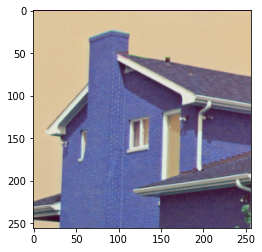

In [5]:
img = cv2.imread('./Picture/House256rgb.png', 1)
print(img.shape)
plot.imshow(img)
plot.show()

### RGB & BGR

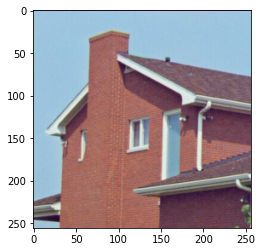

In [6]:
img = cv2.imread('./Picture/House256rgb.png', 1)
[b, g, r] = cv2.split(img)
img_rgb = cv2.merge([r, g, b])
plot.imshow(img_rgb)
plot.show()

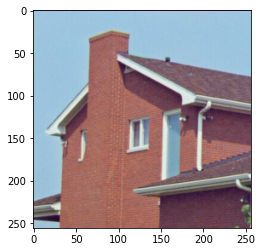

In [7]:
img = cv2.imread('./Picture/House256rgb.png', 1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot.imshow(img_rgb)
plot.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


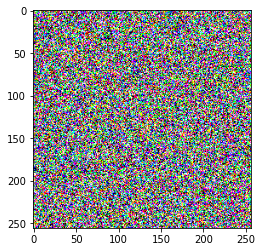

In [8]:
plot.imshow(np.random.randn(256,256,3)*255)
plot.show()

### 图像保存 JPEG和PNG

In [9]:
img = cv2.imread('./Picture/House256rgb.png')
cv2.imwrite('imageTest_PNG.png', img)

True

In [10]:
img = cv2.imread('./Picture/House256rgb.png')
Quality = 80
cv2.imwrite('imageTest_JPEG_%d.jpg' % Quality, img, [cv2.IMWRITE_JPEG_QUALITY, Quality])

True

### 颜色空间转换

### RGB 

In [11]:
img = cv2.imread('./Picture/House256rgb.png')
cv2.imshow('B', img[:,:,0])
cv2.imshow('G', img[:,:,1])
cv2.imshow('R', img[:,:,2])
cv2.waitKey(0)

-1

(256, 256)


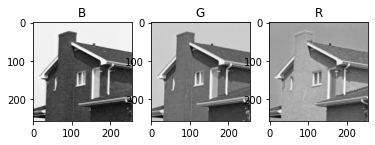

In [12]:
img = cv2.imread('./Picture/House256rgb.png')
print(img[:,:,0].shape)
plot.subplot(131)
plot.imshow(img[:,:,0], cmap='gray')
plot.title('B')
plot.subplot(132)
plot.imshow(img[:,:,1], cmap='gray')
plot.title('G')
plot.subplot(133)
plot.imshow(img[:,:,2], cmap='gray')
plot.title('R')
plot.show()

## RGB->YCrCb

In [ ]:
# img = cv2.imread('./Picture/House256rgb.png')
# img_YCbCr = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
# cv2.imshow('Y', img_YCbCr[:,:,0])
# cv2.imshow('Cb', img_YCbCr[:,:,1])
# cv2.imshow('Cr', img_YCbCr[:,:,2])
# cv2.waitKey(0)

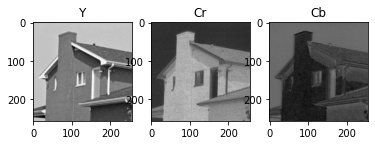

In [13]:
img = cv2.imread('./Picture/House256rgb.png')
img_YCbCr = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
plot.subplot(131)
plot.imshow(img_YCbCr[:,:,0], cmap='gray')
plot.title('Y')
plot.subplot(132)
plot.imshow(img_YCbCr[:,:,1], cmap='gray')
plot.title('Cr')
plot.subplot(133)
plot.imshow(img_YCbCr[:,:,2], cmap='gray')
plot.title('Cb')
plot.show()

### RGB --> HSV

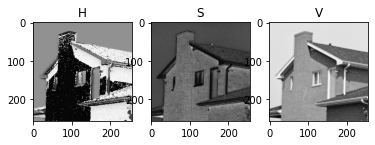

In [14]:
img = cv2.imread('./Picture/House256rgb.png')
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plot.subplot(131)
plot.imshow(img_HSV[:,:,0], cmap='gray')
plot.title('H')
plot.subplot(132)
plot.imshow(img_HSV[:,:,1], cmap='gray')
plot.title('S')
plot.subplot(133)
plot.imshow(img_HSV[:,:,2], cmap='gray')
plot.title('V')
plot.show()

## 在图中画一条蓝线和一个红点

In [15]:
for k in range(0, 256):
    img[k, 100, :] = [255, 0, 0]

img[200, 200] = [0, 0, 255]
    
cv2.imshow('image', img)
cv2.waitKey(0)

-1

In [16]:
disrow = 500
discol = 500
new_img = cv2.resize(img, (disrow, discol), interpolation = cv2.INTER_CUBIC)
cv2.imshow('new_img', new_img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [17]:
line_color = (0, 255, 0)
line_width = 2
x = 100
y = 200
w = 180
h = 90
cv2.rectangle(new_img, (x, y), (x + w, y + h), line_color, line_width)
cv2.imshow('new_img', new_img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [3]:
cap = cv2.VideoCapture("bandicam 2022-09-05 09-22-47-754.mp4")
ret, frame = cap.read()
# 显示视频帧
cv2.imshow("capture", frame)
cv2.waitKey(0)
cap.release()
#关闭所有窗口
cv2.destroyAllWindows()

In [4]:
import cv2

cap = cv2.VideoCapture("bandicam 2022-09-05 09-22-47-754.mp4")
while(1):
# 读取视频帧
    ret, frame = cap.read()
# 显示视频帧
    cv2.imshow("capture", frame)
#等候50ms,播放下一帧，或者按q键退出
    if cv2.waitKey(1000) &0xFF ==ord('q'):
        break
#释放视频流
cap.release()
#关闭所有窗口
cv2.destroyAllWindows()